# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [8]:
# Solucion propuesta

import pandas as pd
from google.colab import drive

# Montar Google Drive en Colab
drive.mount('/content/drive')

# Cargar el archivo CSV desde Google Drive
file_path = '/content/drive/MyDrive/accidents-1.csv'  # Ajusta la ruta si es necesario
df = pd.read_csv(file_path, delimiter=';')

# 1. Overview de la data
print("=== Información general del dataset ===")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print("\nColumnas disponibles:")
print(df.columns.tolist())

# Descripción de las columnas
column_description = {
    "BOROUGH": "Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).",
    "COLLISION_ID": "Identificador único asignado a cada colisión para diferenciar los accidentes registrados.",
    "CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)": "Factores que contribuyeron a la ocurrencia del accidente.",
    "CROSS STREET NAME": "Nombre de la calle transversal más cercana al lugar del accidente.",
    "DATE": "Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.",
    "TIME": "Hora del accidente en formato HH:MM AM/PM.",
    "LATITUDE y LONGITUDE": "Coordenadas geográficas del lugar del accidente.",
    "NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED": "Número de personas heridas en el accidente.",
    "NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS": "Número de víctimas fatales en el accidente.",
    "ON STREET NAME": "Nombre de la calle donde ocurrió el accidente.",
    "VEHICLE TYPE CODE (1, 2, 3, 4, 5)": "Tipos de vehículos involucrados en el accidente.",
    "ZIP CODE": "Código postal correspondiente a la ubicación del accidente."
}

print("\nDescripción de las columnas:")
for col, desc in column_description.items():
    print(f"- {col}: {desc}")

# 2. Limpieza del dataset
print("\n=== Limpieza del dataset ===")

# Paso 1: Identificar los valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Paso 2: Decidir el método de imputación
# Imputación para ZIP CODE: Moda por municipio (BOROUGH)
df['ZIP CODE'] = df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.fillna(x.mode()[0]))

# Imputación para LATITUDE y LONGITUDE: Media por municipio (BOROUGH)
df['LATITUDE'] = df.groupby('BOROUGH')['LATITUDE'].transform(lambda x: x.fillna(x.mean()))
df['LONGITUDE'] = df.groupby('BOROUGH')['LONGITUDE'].transform(lambda x: x.fillna(x.mean()))

# Imputación para ON STREET NAME: "UNKNOWN"
df['ON STREET NAME'] = df['ON STREET NAME'].fillna("UNKNOWN")

# Imputación para CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5): "Unspecified"
for i in range(1, 6):
    col = f'CONTRIBUTING FACTOR VEHICLE {i}'
    df[col] = df[col].fillna("Unspecified")

# Imputación para VEHICLE TYPE CODE (1, 2, 3, 4, 5): "Unknown"
for i in range(1, 6):
    col = f'VEHICLE TYPE CODE {i}'
    df[col] = df[col].fillna("Unknown")

# Verificar que no queden valores nulos
print("\nValores faltantes después de la limpieza:")
print(df.isnull().sum())

# Guardar el dataset limpio en Google Drive
output_path = '/content/drive/MyDrive/accidents_cleaned.csv'
df.to_csv(output_path, index=False, sep=';')
print(f"\nDataset limpio guardado como '{output_path}'.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Información general del dataset ===
Número de filas: 238522
Número de columnas: 24

Columnas disponibles:
['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

Descripción de las columnas:
- BOROUGH: Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- COLLISION_ID: Identificador único asignado a cada colisión 

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [ ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [X] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [X] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


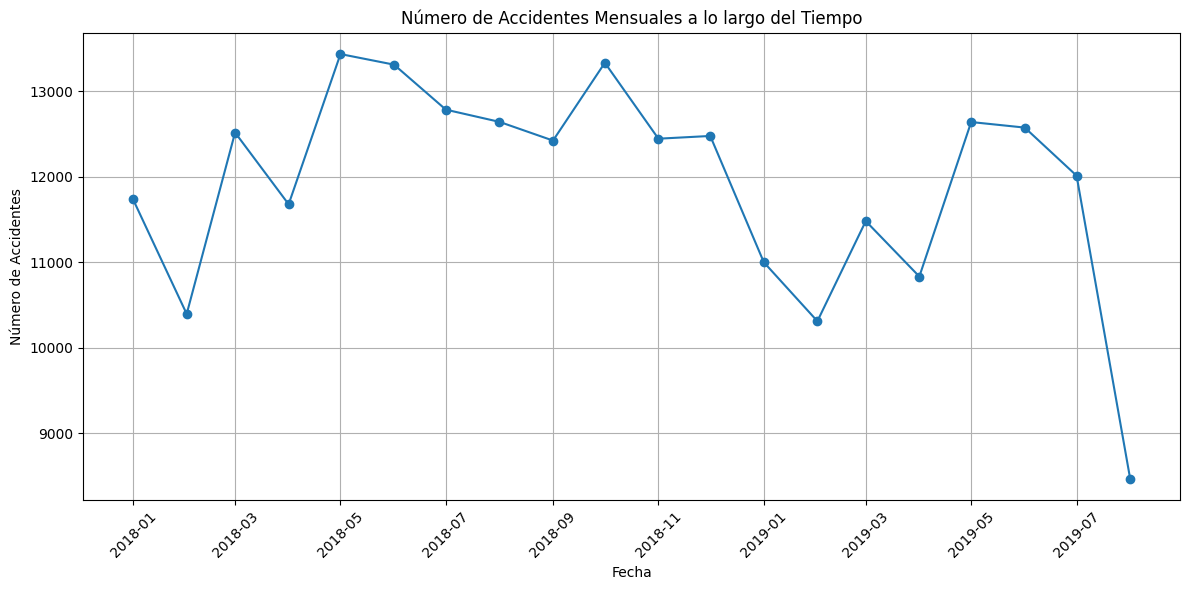


No hay datos disponibles para el último año y medio.


In [19]:
# Solución propuesta

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV limpio
df = pd.read_csv('/content/drive/MyDrive/accidents_cleaned.csv', delimiter=';')

# Convertir la columna 'DATE' a formato de fecha
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

# Agrupar los datos por mes y contar el número de accidentes
df['MONTH'] = df['DATE'].dt.to_period('M')  # Convertir la fecha a un periodo mensual
monthly_accidents = df.groupby('MONTH').size()

# Convertir el índice a formato de fecha para facilitar la visualización
monthly_accidents.index = monthly_accidents.index.to_timestamp()

# Generar el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(monthly_accidents.index, monthly_accidents.values, marker='o', linestyle='-')
plt.title('Número de Accidentes Mensuales a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Accidentes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis de la tendencia en el último año y medio
last_year_and_half = monthly_accidents[monthly_accidents.index >= '2022-01-01']
if not last_year_and_half.empty:
    print("\nTendencia de accidentes en el último año y medio:")
    print(last_year_and_half)
else:
    print("\nNo hay datos disponibles para el último año y medio.")

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

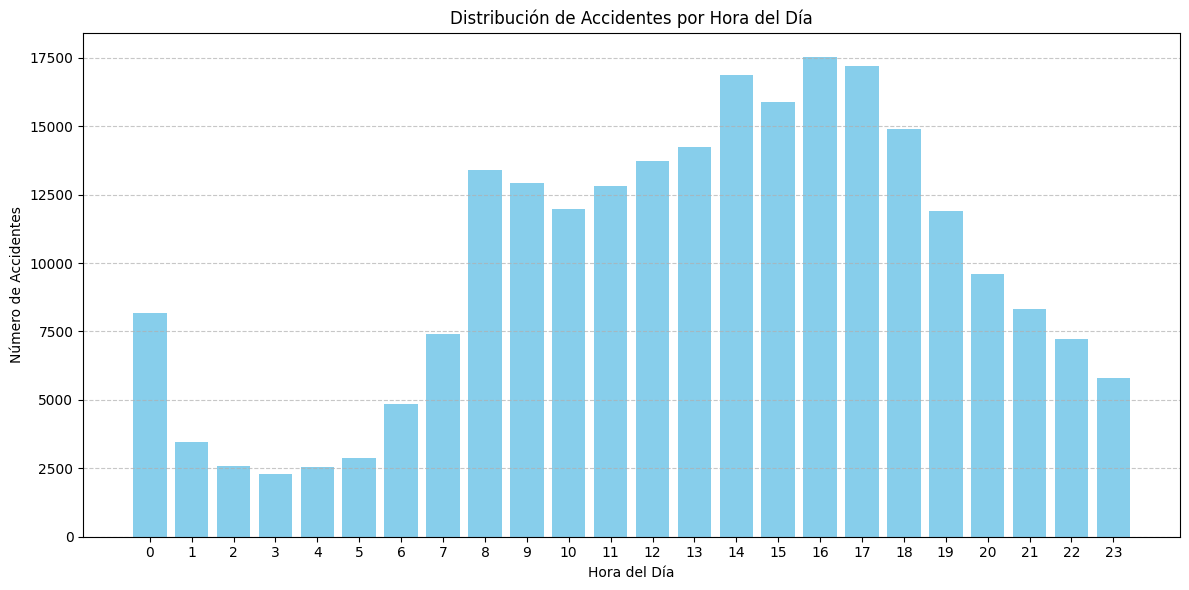

In [18]:
# Solución propuesta

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV limpio
df = pd.read_csv('/content/drive/MyDrive/accidents_cleaned.csv', delimiter=';')

# Convertir la columna 'TIME' a formato de hora
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M').dt.hour

# Crear una nueva columna 'HOUR' basada en la hora extraída
df['HOUR'] = df['TIME']

# Agrupar los datos por hora y contar el número de accidentes
hourly_accidents = df.groupby('HOUR').size()

# Generar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(hourly_accidents.index, hourly_accidents.values, color='skyblue')
plt.title('Distribución de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')
plt.xticks(range(24))  # Eje X de 0 a 23 horas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

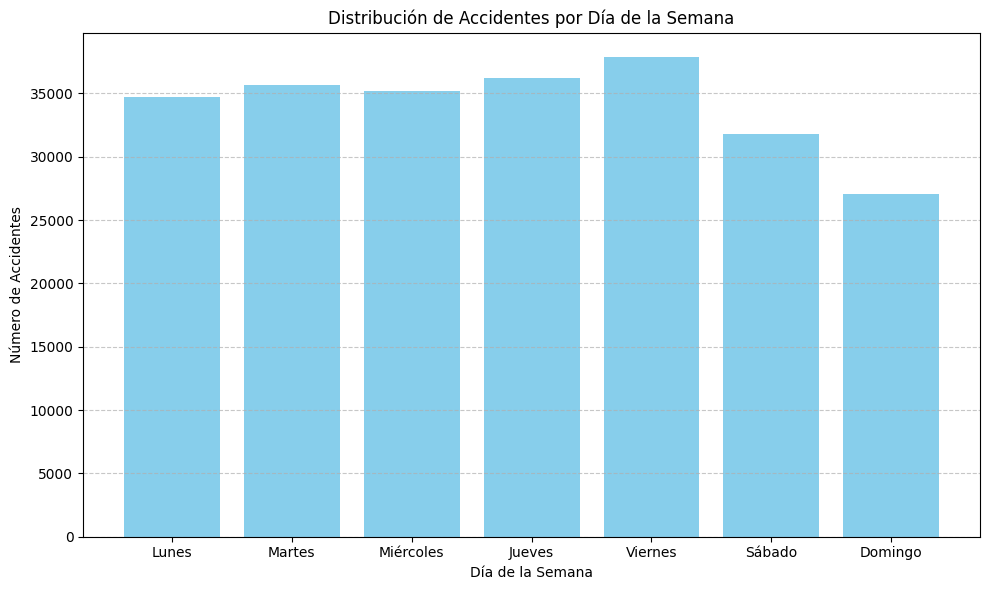

In [17]:
# Solución propuesta

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV limpio
df = pd.read_csv('/content/drive/MyDrive/accidents_cleaned.csv', delimiter=';')

# Convertir la columna 'DATE' a formato de fecha
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

# Extraer el día de la semana (0: lunes, 6: domingo)
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday  # dt.weekday devuelve un número (0-6)

# Mapear los números a nombres de días de la semana
day_names = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}
df['DAY_NAME'] = df['DAY_OF_WEEK'].map(day_names)

# Agrupar los datos por día de la semana y contar el número de accidentes
accidents_by_day = df.groupby('DAY_NAME').size()

# Ordenar los días de la semana en el orden correcto
accidents_by_day = accidents_by_day.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Generar el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(accidents_by_day.index, accidents_by_day.values, color='skyblue')
plt.title('Distribución de Accidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

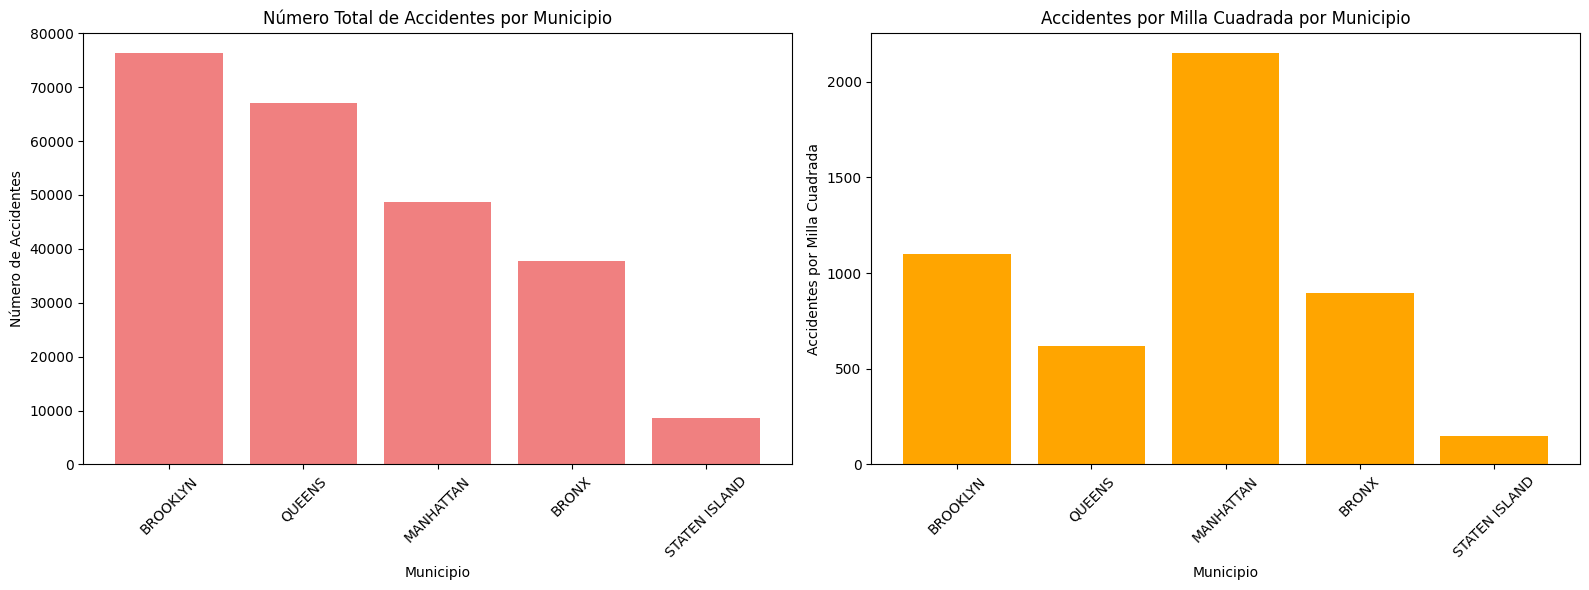


=== Conclusiones ===

1. Variación del número total de accidentes por municipio:
- El municipio con más accidentes es BROOKLYN con 76253 accidentes.
- El municipio con menos accidentes es STATEN ISLAND con 8691 accidentes.
- Orden de municipios por número total de accidentes (de mayor a menor):
BOROUGH
BROOKLYN         76253
QUEENS           67120
MANHATTAN        48749
BRONX            37709
STATEN ISLAND     8691
Name: count, dtype: int64

2. Variación del número de accidentes por milla cuadrada por municipio:
- El municipio con más accidentes por milla cuadrada es MANHATTAN con 2147.53 accidentes por milla cuadrada.
- El municipio con menos accidentes por milla cuadrada es STATEN ISLAND con 151.15 accidentes por milla cuadrada.
- Orden de municipios por accidentes por milla cuadrada (de mayor a menor):
BOROUGH
MANHATTAN        2147.533040
BROOKLYN         1098.746398
BRONX             893.578199
QUEENS            617.479301
STATEN ISLAND     151.147826
dtype: float64

3. Comparació

In [16]:
# Solución propuesta

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV limpio
df = pd.read_csv('/content/drive/MyDrive/accidents_cleaned.csv', delimiter=';')

# Diccionario de áreas por municipio (en millas cuadradas)
area = {
    "BRONX": 42.2,
    "BROOKLYN": 69.4,
    "MANHATTAN": 22.7,
    "QUEENS": 108.7,
    "STATEN ISLAND": 57.5
}

# 1. Número total de accidentes por municipio
accidents_by_borough = df['BOROUGH'].value_counts()

# 2. Accidentes por milla cuadrada por municipio
accidents_per_sq_mile = accidents_by_borough / accidents_by_borough.index.map(area)

# Crear una figura con dos subplots (uno al lado del otro)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Número total de accidentes por municipio
ax1.bar(accidents_by_borough.index, accidents_by_borough.values, color='lightcoral')
ax1.set_title('Número Total de Accidentes por Municipio')
ax1.set_xlabel('Municipio')
ax1.set_ylabel('Número de Accidentes')
ax1.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad

# Gráfico 2: Accidentes por milla cuadrada por municipio
ax2.bar(accidents_per_sq_mile.index, accidents_per_sq_mile.values, color='orange')
ax2.set_title('Accidentes por Milla Cuadrada por Municipio')
ax2.set_xlabel('Municipio')
ax2.set_ylabel('Accidentes por Milla Cuadrada')
ax2.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# 3. Conclusiones basadas en las preguntas del punto 5
print("\n=== Conclusiones ===")

# Pregunta 1: ¿Cómo varía el número total de accidentes en cada municipio?
print("\n1. Variación del número total de accidentes por municipio:")
max_accidents_borough = accidents_by_borough.idxmax()
max_accidents = accidents_by_borough.max()
min_accidents_borough = accidents_by_borough.idxmin()
min_accidents = accidents_by_borough.min()
print(f"- El municipio con más accidentes es {max_accidents_borough} con {max_accidents} accidentes.")
print(f"- El municipio con menos accidentes es {min_accidents_borough} con {min_accidents} accidentes.")
print(f"- Orden de municipios por número total de accidentes (de mayor a menor):")
print(accidents_by_borough.sort_values(ascending=False))

# Pregunta 2: ¿Cómo varía el número de accidentes por milla cuadrada en cada municipio?
print("\n2. Variación del número de accidentes por milla cuadrada por municipio:")
max_density_borough = accidents_per_sq_mile.idxmax()
max_density = accidents_per_sq_mile.max()
min_density_borough = accidents_per_sq_mile.idxmin()
min_density = accidents_per_sq_mile.min()
print(f"- El municipio con más accidentes por milla cuadrada es {max_density_borough} con {max_density:.2f} accidentes por milla cuadrada.")
print(f"- El municipio con menos accidentes por milla cuadrada es {min_density_borough} con {min_density:.2f} accidentes por milla cuadrada.")
print(f"- Orden de municipios por accidentes por milla cuadrada (de mayor a menor):")
print(accidents_per_sq_mile.sort_values(ascending=False))

# Comparación adicional
print("\n3. Comparación entre accidentes totales y densidad:")
for borough in accidents_by_borough.index:
    total_accidents = accidents_by_borough[borough]
    density = accidents_per_sq_mile[borough]
    print(f"- {borough}: {total_accidents} accidentes totales, {density:.2f} accidentes por milla cuadrada.")

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

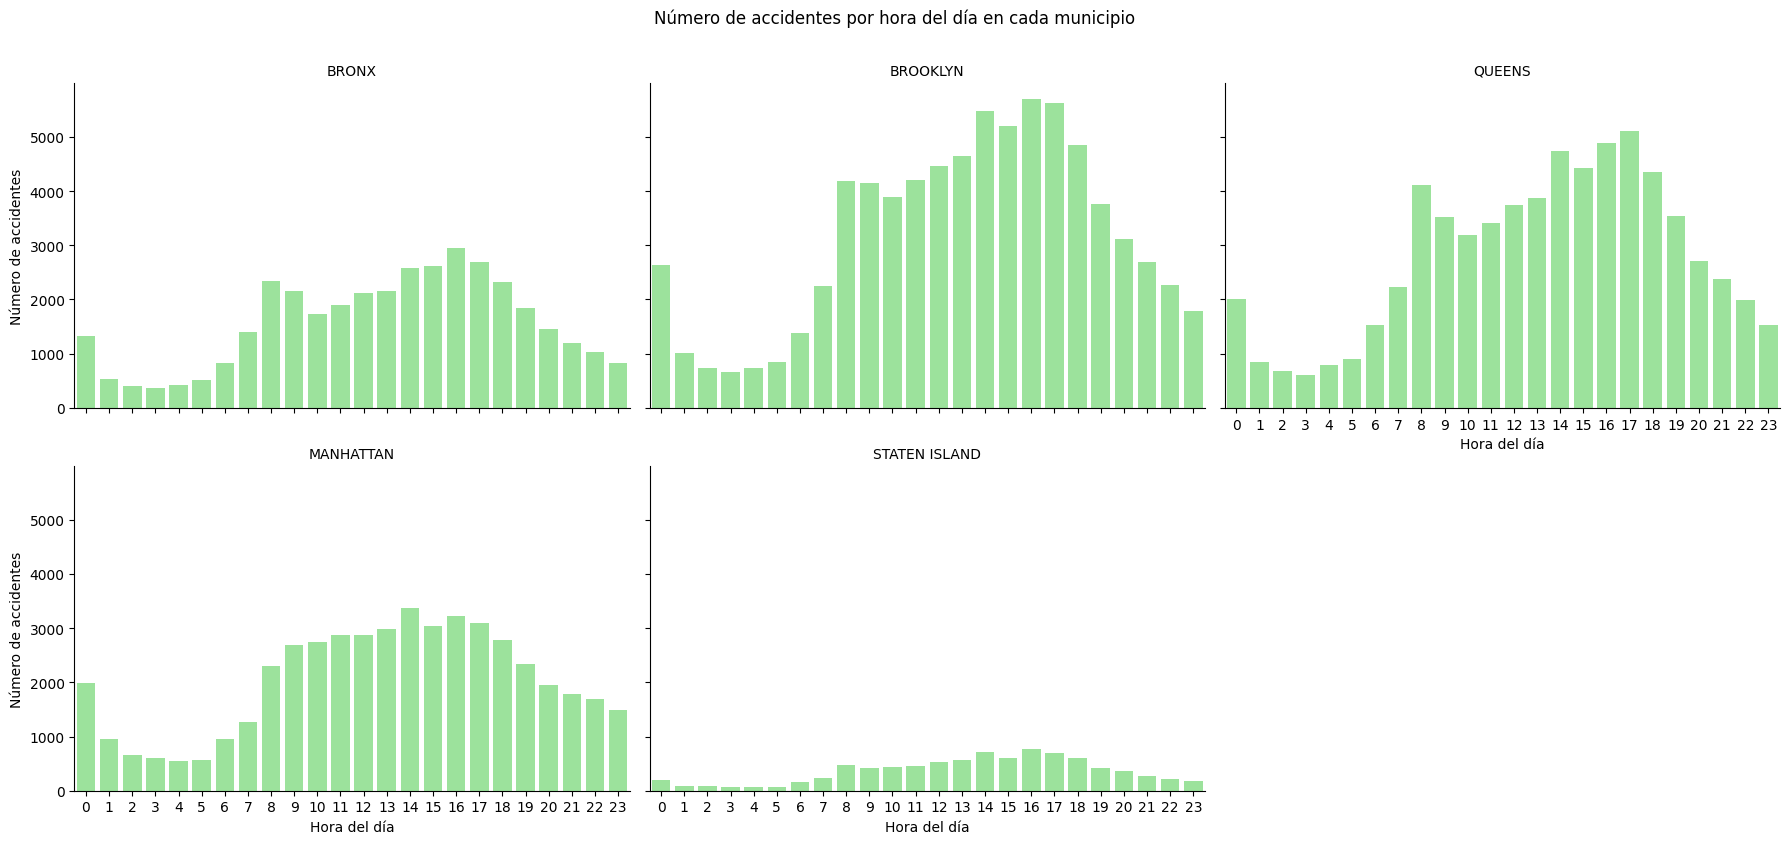

In [15]:
# Solución propuesta

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Usar la ruta del archivo proporcionada
file_path = '/content/drive/MyDrive/accidents_cleaned.csv'
df = pd.read_csv(file_path, delimiter=';', parse_dates=['DATE'])

# Crear una nueva columna HOUR basada en los datos de la columna TIME
df['HOUR'] = pd.to_datetime(df['TIME'], format='%H:%M', errors='coerce').dt.hour

# Eliminar valores nulos en HOUR y BOROUGH
df = df.dropna(subset=['HOUR', 'BOROUGH'])

# Crear una cuadrícula de parcelas con los datos por hora de cada municipio
g = sns.FacetGrid(df, col="BOROUGH", col_wrap=3, height=4, aspect=1.5)
g.map(sns.countplot, "HOUR", order=range(24), color='lightgreen')

# Ajustar los títulos y etiquetas
g.set_axis_labels("Hora del día", "Número de accidentes")
g.set_titles("{col_name}")
g.fig.suptitle("Número de accidentes por hora del día en cada municipio", y=1.05)

plt.show()

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

<ipython-input-20-96ca041a70e5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=factor_counts['Factor'][:10], x=factor_counts['Count'][:10], palette='viridis')


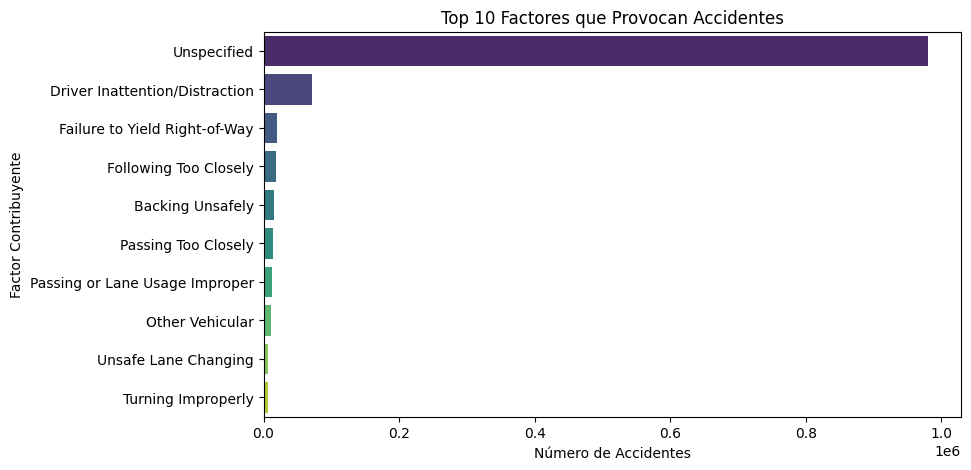

In [20]:
# Solución propuesta

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usar la ruta del archivo proporcionada
file_path = '/content/drive/MyDrive/accidents_cleaned.csv'
df = pd.read_csv(file_path, delimiter=';', parse_dates=['DATE'])

# Concatenar las columnas de factores contribuyentes conservando sus índices
factors = pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'], df['CONTRIBUTING FACTOR VEHICLE 2'],
                     df['CONTRIBUTING FACTOR VEHICLE 3'], df['CONTRIBUTING FACTOR VEHICLE 4'],
                     df['CONTRIBUTING FACTOR VEHICLE 5']], ignore_index=True)

# Eliminar valores nulos
factors = factors.dropna()

# Contar el número de repeticiones de factores contribuidos por accidente
factor_counts = factors.value_counts().reset_index()
factor_counts.columns = ['Factor', 'Count']

# Crear un gráfico de barras para mostrar los factores que provocan la mayoría de los accidentes
plt.figure(figsize=(9, 5))
sns.barplot(y=factor_counts['Factor'][:10], x=factor_counts['Count'][:10], palette='viridis')
plt.xlabel("Número de Accidentes")
plt.ylabel("Factor Contribuyente")
plt.title("Top 10 Factores que Provocan Accidentes")
plt.show()


### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

<ipython-input-23-90c31cad526f>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_vehicles_per_borough = vehicle_counts.groupby('BOROUGH', group_keys=False).apply(lambda x: x.nlargest(10, 'COUNT')).reset_index(drop=True)


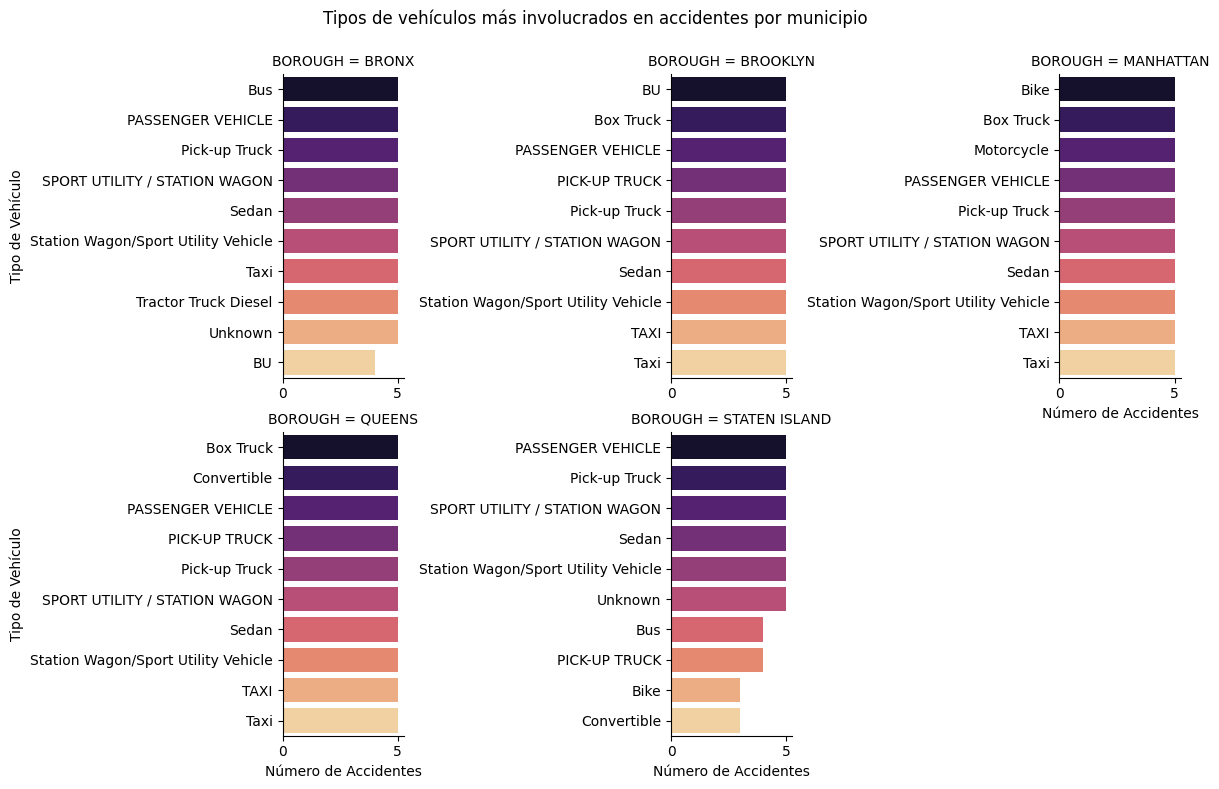

In [23]:
# Solución propuesta

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usar la ruta del archivo proporcionada
file_path = '/content/drive/MyDrive/accidents_cleaned.csv'
df = pd.read_csv(file_path, delimiter=';', parse_dates=['DATE'])

# Concatenar las columnas de tipos de vehículos conservando sus índices
vehicles = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2'],
                      df['VEHICLE TYPE CODE 3'], df['VEHICLE TYPE CODE 4'],
                      df['VEHICLE TYPE CODE 5']], ignore_index=True)

# Eliminar valores nulos
vehicles = vehicles.dropna()

# Contar el número de repeticiones de tipos de vehículos por municipio
vehicle_counts = df[['BOROUGH', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
                     'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].melt(id_vars=['BOROUGH'], value_name='VEHICLE').dropna()
vehicle_counts = vehicle_counts.drop_duplicates().groupby(['BOROUGH', 'VEHICLE']).size().reset_index(name='COUNT')

# Filtrar los 10 vehículos más comunes por municipio
top_vehicles_per_borough = vehicle_counts.groupby('BOROUGH', group_keys=False).apply(lambda x: x.nlargest(10, 'COUNT')).reset_index(drop=True)

# Crear un gráfico de barras para mostrar los tipos de vehículos más involucrados en accidentes por municipio
g = sns.FacetGrid(top_vehicles_per_borough, col='BOROUGH', col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.barplot, x='COUNT', y='VEHICLE', hue='VEHICLE', palette='magma', legend=False)
g.set_axis_labels("Número de Accidentes", "Tipo de Vehículo")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Tipos de vehículos más involucrados en accidentes por municipio")
plt.show()




### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [x] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

Total de muertes en 2018: 138
Total de muertes en 2019: 83
Porcentaje de aumento en muertes (2019 vs 2018): -39.86%

Número de peatones heridos:
2018: 8203
2019: 4802

Número de ciclistas heridos:
2018: 3393
2019: 2208


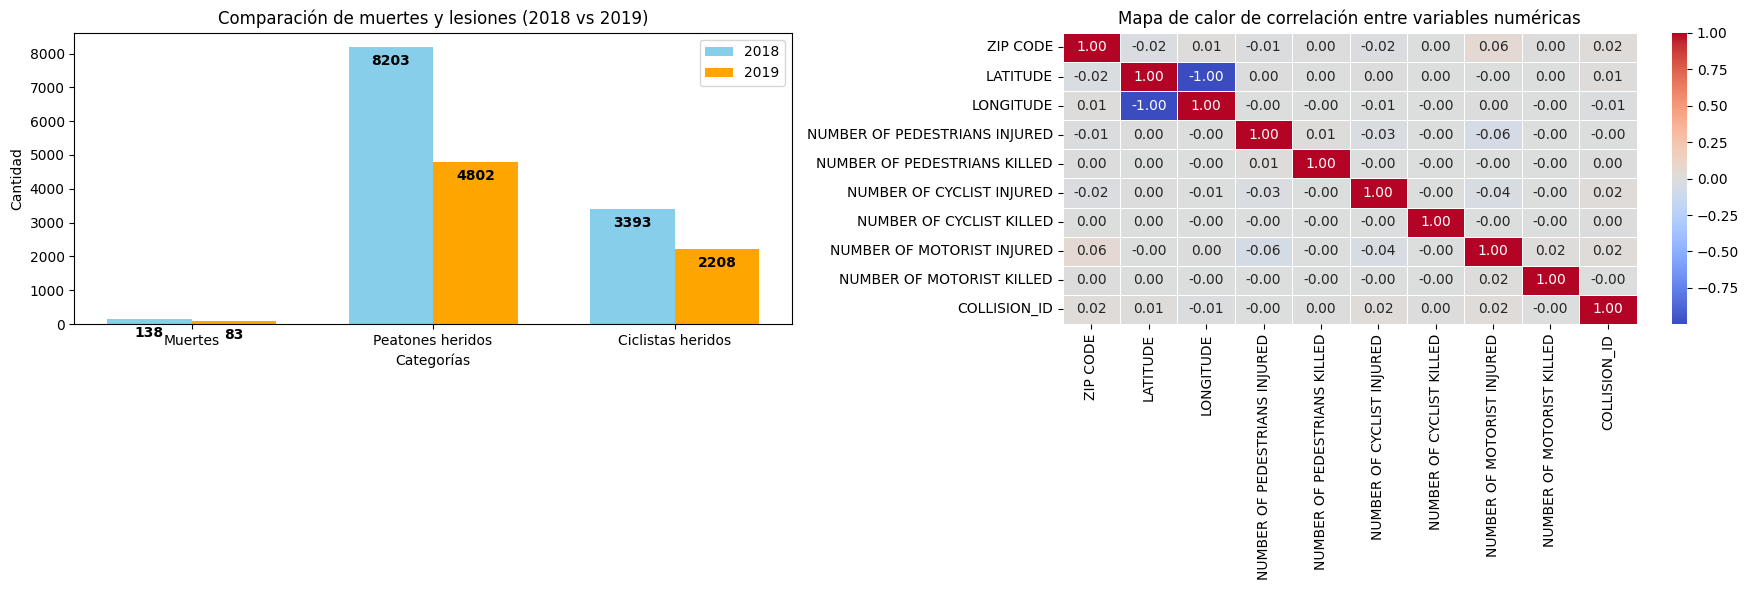

In [28]:
# Solución propuesta

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cargar el archivo CSV desde la ruta especificada
df = pd.read_csv('/content/drive/MyDrive/accidents_cleaned.csv', delimiter=';')

# Convertir la columna 'DATE' a tipo datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

# Filtrar los datos para los años 2018 y 2019
df_2018 = df[df['DATE'].dt.year == 2018]
df_2019 = df[df['DATE'].dt.year == 2019]

# Calcular el número total de muertes en 2018 y 2019
total_deaths_2018 = df_2018[['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']].sum().sum()
total_deaths_2019 = df_2019[['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']].sum().sum()

# Calcular el número de peatones y ciclistas heridos en 2018 y 2019
pedestrians_injured_2018 = df_2018['NUMBER OF PEDESTRIANS INJURED'].sum()
cyclists_injured_2018 = df_2018['NUMBER OF CYCLIST INJURED'].sum()

pedestrians_injured_2019 = df_2019['NUMBER OF PEDESTRIANS INJURED'].sum()
cyclists_injured_2019 = df_2019['NUMBER OF CYCLIST INJURED'].sum()

# Calcular el porcentaje de aumento en muertes entre 2018 y 2019
percentage_increase_deaths = ((total_deaths_2019 - total_deaths_2018) / total_deaths_2018) * 100

# Mostrar los resultados
print(f"Total de muertes en 2018: {total_deaths_2018}")
print(f"Total de muertes en 2019: {total_deaths_2019}")
print(f"Porcentaje de aumento en muertes (2019 vs 2018): {percentage_increase_deaths:.2f}%")

print("\nNúmero de peatones heridos:")
print(f"2018: {pedestrians_injured_2018}")
print(f"2019: {pedestrians_injured_2019}")

print("\nNúmero de ciclistas heridos:")
print(f"2018: {cyclists_injured_2018}")
print(f"2019: {cyclists_injured_2019}")

# Datos para el gráfico de barras
categories = ['Muertes', 'Peatones heridos', 'Ciclistas heridos']
values_2018 = [total_deaths_2018, pedestrians_injured_2018, cyclists_injured_2018]
values_2019 = [total_deaths_2019, pedestrians_injured_2019, cyclists_injured_2019]

# Posiciones de las barras
x = np.arange(len(categories))

# Ancho de las barras
width = 0.35

# Crear una figura con dos subplots (uno al lado del otro)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de barras (izquierda)
bar1 = ax1.bar(x - width/2, values_2018, width, label='2018', color='skyblue')
bar2 = ax1.bar(x + width/2, values_2019, width, label='2019', color='orange')

# Añadir etiquetas, título y leyenda al gráfico de barras
ax1.set_xlabel('Categorías')
ax1.set_ylabel('Cantidad')
ax1.set_title('Comparación de muertes y lesiones (2018 vs 2019)')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()

# Añadir valores encima de las barras
def autolabel(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -5),  # -5 puntos de desplazamiento vertical para ajustar hacia abajo
                    textcoords="offset points",
                    ha='center', va='top',  # 'top' para que la etiqueta esté dentro de la barra
                    fontsize=10, color='black', fontweight='bold')

autolabel(bar1, ax1)
autolabel(bar2, ax1)

# Mapa de calor de correlación (derecha)
# Seleccionar solo las columnas numéricas para el mapa de calor
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Generar el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax2)
ax2.set_title("Mapa de calor de correlación entre variables numéricas")

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

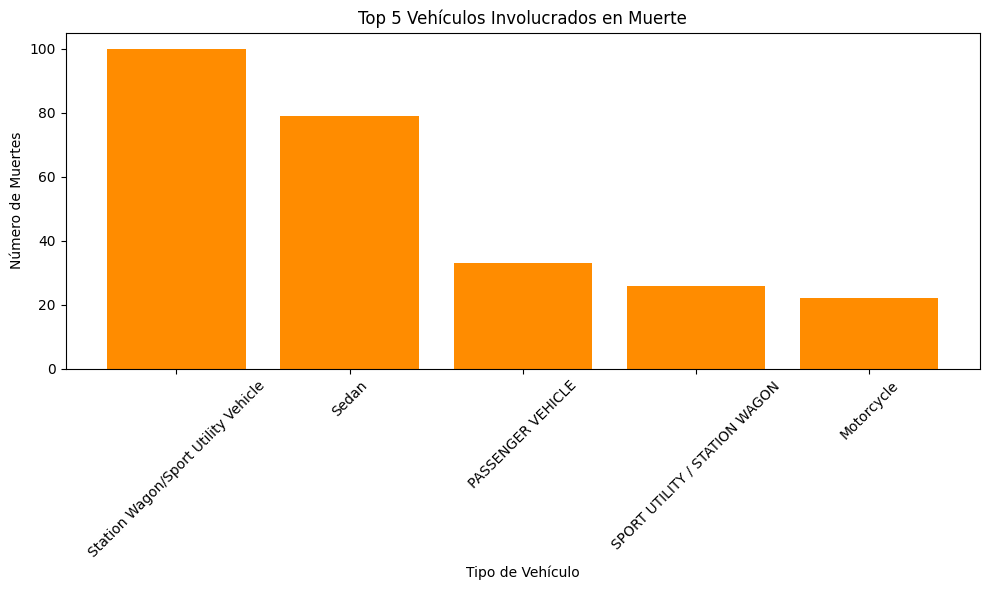

Vehículos más frecuentes en muertes (excluyendo 'Unknown'):
                       Vehicle Type  Total Deaths
Station Wagon/Sport Utility Vehicle           100
                              Sedan            79
                  PASSENGER VEHICLE            33
      SPORT UTILITY / STATION WAGON            26
                         Motorcycle            22


In [24]:
# Solución propuesta

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV desde la ruta especificada
df = pd.read_csv('/content/drive/MyDrive/accidents_cleaned.csv', delimiter=';')

# Calcular el número total de muertes por accidente
df['TOTAL_DEATHS'] = df[['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']].sum(axis=1)

# Crear una lista de todas las columnas de tipo de vehículo
vehicle_columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Inicializar un diccionario para contar las muertes por tipo de vehículo
death_counts = {}

# Iterar sobre cada fila del DataFrame
for index, row in df.iterrows():
    total_deaths = row['TOTAL_DEATHS']
    if total_deaths > 0:
        for col in vehicle_columns:
            vehicle_type = row[col]
            if pd.notna(vehicle_type) and vehicle_type != "Unknown":
                if vehicle_type in death_counts:
                    death_counts[vehicle_type] += total_deaths
                else:
                    death_counts[vehicle_type] = total_deaths

# Convertir el diccionario a un DataFrame para facilitar la manipulación
death_counts_df = pd.DataFrame(list(death_counts.items()), columns=['Vehicle Type', 'Total Deaths'])

# Ordenar el DataFrame por el número de muertes en orden descendente
death_counts_df = death_counts_df.sort_values(by='Total Deaths', ascending=False)

# Seleccionar los 5 vehículos principales
top_5_vehicles = death_counts_df.head(5)

# Graficar los 5 vehículos principales
plt.figure(figsize=(10, 6))
plt.bar(top_5_vehicles['Vehicle Type'], top_5_vehicles['Total Deaths'], color='darkorange')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Muertes')
plt.title('Top 5 Vehículos Involucrados en Muerte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar los vehículos más frecuentes y cuánto más que los demás en una tabla
print("Vehículos más frecuentes en muertes (excluyendo 'Unknown'):")
print(top_5_vehicles.to_string(index=False))